# Health Insurance Prediction

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [104]:
train_data=pd.read_csv("C:/Users/LENOVO-PC/Downloads/train 1.csv")
test_data=pd.read_csv("C:/Users/LENOVO-PC/Downloads/test.csv")
ss_data=pd.read_csv("C:/Users/LENOVO-PC/Downloads/sample_submission.csv")


In [3]:
print(train_data.shape,test_data.shape)
train_data.head()

(381109, 12) (127037, 11)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [166]:
train_data.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0


# Data Preprocessing

In [5]:
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
test_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null int64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null int64
Policy_Sales_Channel    381109 non-null int64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
id                      127037 non-null int64
Gender                  127037 non-null object
Age                     127037 non-null int64
Driving_License         127037 non-null int64
Region_Code             127037 non-null float64
Previously_Insured      127037 non-null int64
Vehicle_Age             127037 non-null object
Vehicle_Damage          127037 non-null object
Annual_Premium          127037 non-null float64
Policy_Sales_Channel    127037 non-null float64
Vintage                 127037 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


# Converting Categorical values to numerical

In [9]:
train_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
train_data['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [11]:
train_data['Vehicle_Damage'].unique()            

array(['Yes', 'No'], dtype=object)

# using dictionary and map function we convert it to numerical

In [13]:
b = {'> 2 Years':2, '1-2 Year':1, '< 1 Year':0}
b
train_data['Vehicle_Age'] = train_data['Vehicle_Age'].map(b)
train_data
a = {'Male':0,'Female':1}
train_data['Gender'] = train_data['Gender'].map(a)
train_data
c = {'No':0,'Yes':1}
c
train_data['Vehicle_Damage'] = train_data['Vehicle_Damage'].map(c)
train_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28,0,2,1,40454,26,217,1
1,2,0,76,1,3,0,1,0,33536,26,183,0
2,3,0,47,1,28,0,2,1,38294,26,27,1
3,4,0,21,1,11,1,0,0,28619,152,203,0
4,5,1,29,1,41,1,0,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,0,74,1,26,1,1,0,30170,26,88,0
381105,381106,0,30,1,37,1,0,0,40016,152,131,0
381106,381107,0,21,1,30,1,0,0,35118,160,161,0
381107,381108,1,68,1,14,0,2,1,44617,124,74,0


In [14]:
b1 = {'> 2 Years':2,'1-2 Year':1,'< 1 Year':0}
b1
test_data['Vehicle_Age'] = test_data['Vehicle_Age'].map(b1)
test_data
a1 = {'Male':0,'Female':1}
test_data['Gender'] = test_data['Gender'].map(a1)
test_data
c1 = {'No':0,'Yes':1}
c1
test_data['Vehicle_Damage'] = test_data['Vehicle_Damage'].map(c1)
test_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,0,25,1,11.0,1,0,0,35786.0,152.0,53
1,381111,0,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,0,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,0,24,1,27.0,1,0,1,37356.0,152.0,187
4,381114,0,27,1,28.0,1,0,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,1,26,1,37.0,1,0,0,30867.0,152.0,56
127033,508143,1,38,1,28.0,0,1,1,28700.0,122.0,165
127034,508144,0,21,1,46.0,1,0,0,29802.0,152.0,74
127035,508145,0,71,1,28.0,1,1,0,62875.0,26.0,265


1.7660872148961309


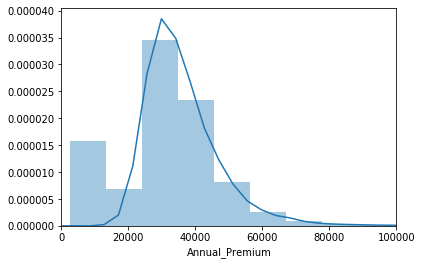

In [160]:
plt.figure()
c=sns.distplot(train_data['Annual_Premium'])
c.set_xlim([0,100000])
print((train_data['Annual_Premium']).skew())

In [91]:
train_data.duplicated().shape

(381109,)

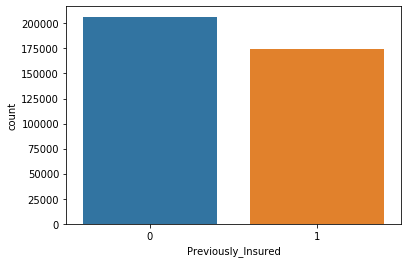

In [16]:
c=sns.countplot(train_data['Previously_Insured'])

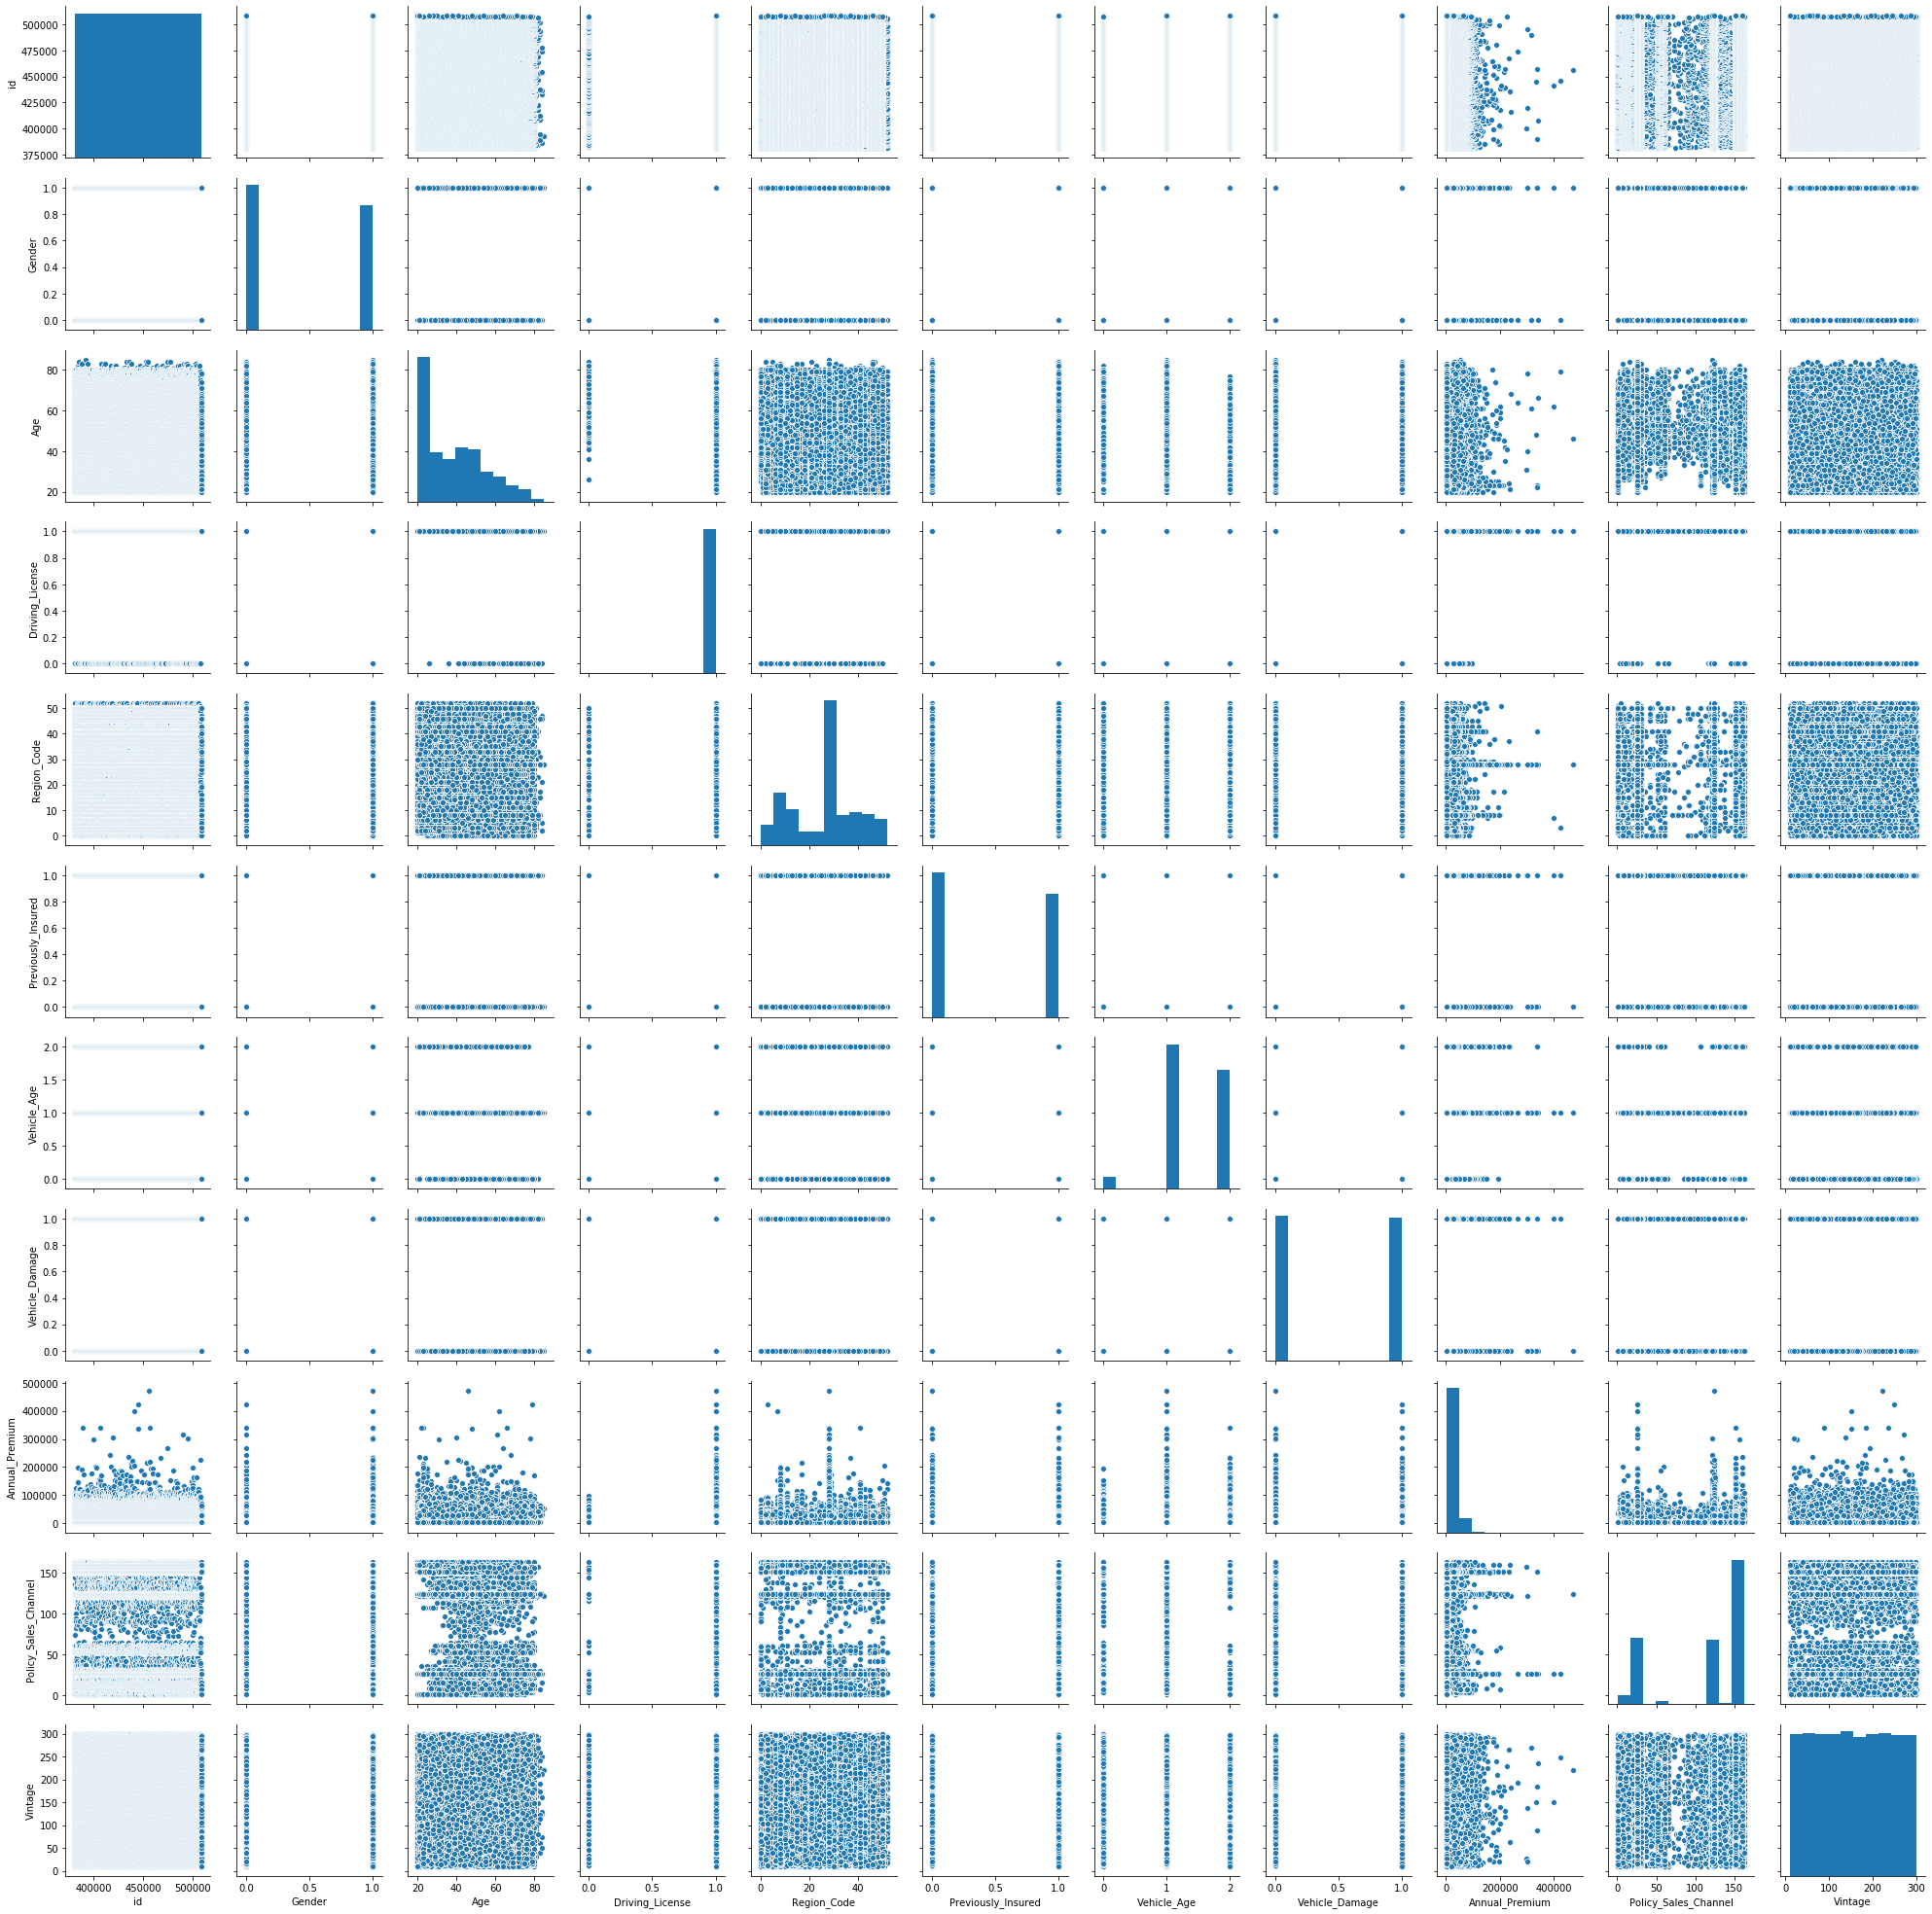

In [17]:
sns.pairplot(train_data)

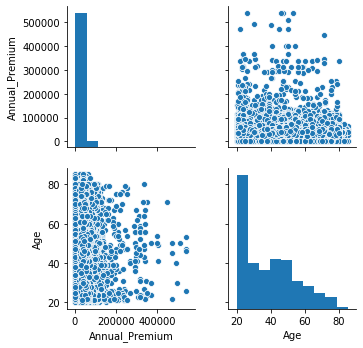

In [17]:
sns.pairplot(train_data,vars=['Annual_Premium','Age'])

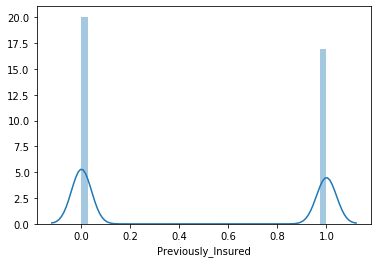

In [42]:
sns.distplot(train_data['Previously_Insured'])

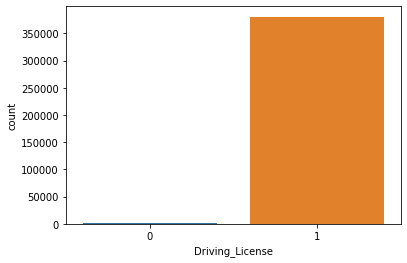

In [46]:
sns.countplot(train_data['Driving_License'])

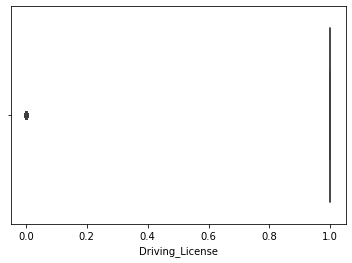

In [93]:
sns.boxplot(train_data['Driving_License'])

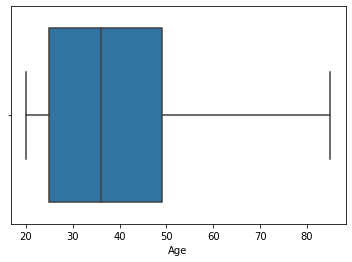

In [94]:
sns.boxplot(train_data['Age'])

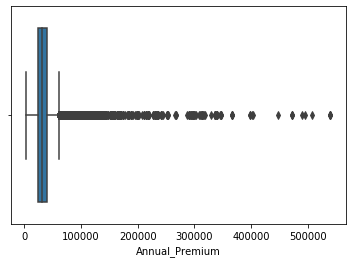

In [95]:
sns.boxplot(train_data['Annual_Premium'])

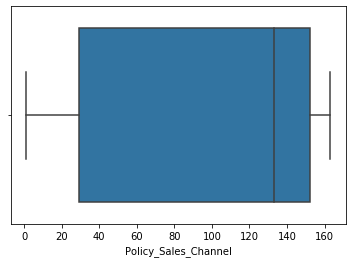

In [96]:
sns.boxplot(train_data['Policy_Sales_Channel'])

In [138]:
corr=train_data.corr()
corr

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


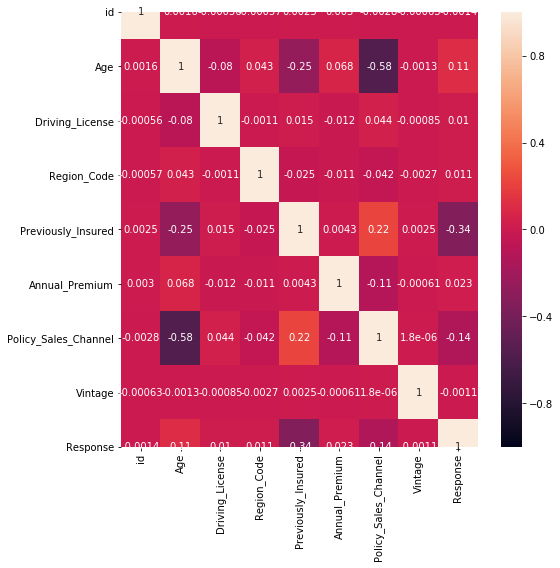

In [139]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(corr,vmax=1,vmin=-1,annot=True)

In [144]:
corr['Response']

id                     -0.001368
Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Annual_Premium          0.022575
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Response                1.000000
Name: Response, dtype: float64

# Model Building and prediction

In [23]:
X_train = train_data.iloc[:,0:11]
X_train.shape

(381109, 11)

In [26]:
y_train=train_data['Response']               
y_train.shape

(381109,)

In [29]:
X_test = test_data.iloc[:,0:11]
X_test.shape
X_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,0,25,1,11.0,1,0,0,35786.0,152.0,53
1,381111,0,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,0,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,0,24,1,27.0,1,0,1,37356.0,152.0,187
4,381114,0,27,1,28.0,1,0,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,1,26,1,37.0,1,0,0,30867.0,152.0,56
127033,508143,1,38,1,28.0,0,1,1,28700.0,122.0,165
127034,508144,0,21,1,46.0,1,0,0,29802.0,152.0,74
127035,508145,0,71,1,28.0,1,1,0,62875.0,26.0,265


In [32]:
y_test=ss_data.iloc[:,1:]
y_test.shape

(127037, 1)

In [33]:
X_train.shape,y_train.shape

((381109, 11), (381109,))

In [34]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model_train=model.fit(X_train,y_train)

C:\Users\LENOVO-PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
import os
pred=model_train.predict(X_test)
print(pred)
#pred.to_csv("predicted data")
#y=pred.reshape(-1)
#y

[0 0 0 ... 0 0 0]


In [32]:
#pred.to_csv("predicted data")
#

In [38]:
train_data.head(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28,0,2,1,40454,26,217,1


In [155]:
pred1=pd.DataFrame({'Actual_Responce':ss_data['Response'],'Predicted_Responce':pred})
print(pred1)
data=pred1.to_csv("predicted data")
data

        Actual_Responce  Predicted_Responce
0                     0                   0
1                     0                   0
2                     0                   0
3                     0                   0
4                     0                   0
...                 ...                 ...
127032                0                   0
127033                0                   0
127034                0                   0
127035                0                   0
127036                0                   0

[127037 rows x 2 columns]


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[127037]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)*100

100.0

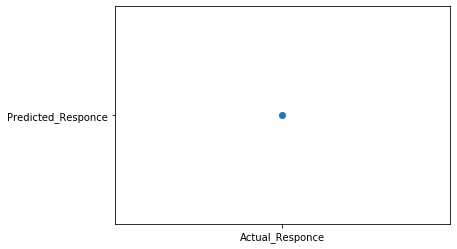

In [70]:
plt.scatter('Actual_Responce','Predicted_Responce')

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127037

    accuracy                           1.00    127037
   macro avg       1.00      1.00      1.00    127037
weighted avg       1.00      1.00      1.00    127037



In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn=KNeighborsClassifier(n_neighbors=3)
knn_train=knn.fit(X_train,y_train)


In [81]:
prediction = knn_train.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
confusion_matrix(y_test,prediction)

array([[126084,    953],
       [     0,      0]], dtype=int64)

In [83]:
accuracy_score(y_test,prediction)

0.9924982485417634

In [87]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    127037
           1       0.00      0.00      0.00         0

    accuracy                           0.99    127037
   macro avg       0.50      0.50      0.50    127037
weighted avg       1.00      0.99      1.00    127037



In [150]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
Dsc_tree = DecisionTreeClassifier(criterion='entropy')

model_train1 = Dsc_tree.fit(X_train,y_train)
print("Training Complete")

Training Complete


In [151]:
pred = model_train.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [152]:
confusion_matrix(y_test,pred)

array([[127037]], dtype=int64)

In [163]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127037

    accuracy                           1.00    127037
   macro avg       1.00      1.00      1.00    127037
weighted avg       1.00      1.00      1.00    127037



In [156]:
accuracy_score(y_test,pred)

1.0

In [164]:
a=10
type(a)

int